<a href="https://colab.research.google.com/github/ua-datalab/MLWorkshops/blob/main/Perceptrons_and_Neural_Networks/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This material is reused from Sebastian Raschka's Deep Learning Fundamentals Course.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import the dataset using pandas and explore

In [4]:
url = 'https://raw.githubusercontent.com/ua-datalab/Workshops/main/Perceptron_and_Neural_Network/perceptron_toy_data.txt'
df = pd.read_csv(url, sep='\t')

In [5]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [6]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [7]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [8]:
X_train.shape

(20, 2)

In [9]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y_train.shape

(20,)

In [12]:
np.bincount(y_train)

array([10, 10])

# Visualize the dataset

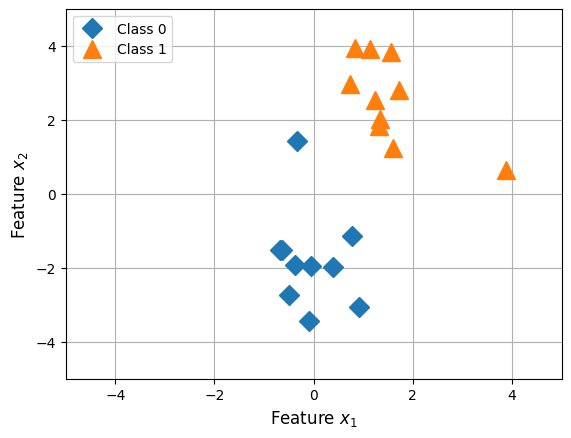

In [13]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

# Perceptron

In [15]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_a = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_a += x[i] * self.weights[i]

        if weighted_sum_a > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [16]:
ppn = Perceptron(num_features=2)

x=[1.1,2.1]
ppn.update(x, true_y=1)

1

In [17]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: [1.1, 2.1]
  Bias: 1.0


In [18]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

In [20]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Epoch 4 errors 0
Epoch 5 errors 0


# Visualize the decision boundary

In [71]:
# Shuffle the order of the data so that we get a more interesting decision boundary
np.random.seed(1)

data = np.concatenate((X_train, y_train.reshape(20,1)), axis=1)
np.random.shuffle(data)
data

array([[-0.37, -1.91,  0.  ],
       [ 1.31,  1.85,  1.  ],
       [-0.49, -2.74,  0.  ],
       [ 3.88,  0.65,  1.  ],
       [ 0.91, -3.07,  0.  ],
       [ 1.14,  3.91,  1.  ],
       [-0.63, -1.53,  0.  ],
       [ 1.56,  3.85,  1.  ],
       [-0.68, -1.52,  0.  ],
       [-0.33,  1.44,  0.  ],
       [ 1.59,  1.25,  1.  ],
       [ 0.77, -1.14,  0.  ],
       [ 1.33,  2.03,  1.  ],
       [ 1.23,  2.54,  1.  ],
       [-0.05, -1.95,  0.  ],
       [ 1.73,  2.8 ,  1.  ],
       [-0.1 , -3.43,  0.  ],
       [ 0.83,  3.94,  1.  ],
       [ 0.73,  2.97,  1.  ],
       [ 0.39, -1.99,  0.  ]])

In [72]:
shuffled_X_train = data[:,0:2]
shuffled_y_train = data[:,2]

In [73]:
shuffled_X_train

array([[-0.37, -1.91],
       [ 1.31,  1.85],
       [-0.49, -2.74],
       [ 3.88,  0.65],
       [ 0.91, -3.07],
       [ 1.14,  3.91],
       [-0.63, -1.53],
       [ 1.56,  3.85],
       [-0.68, -1.52],
       [-0.33,  1.44],
       [ 1.59,  1.25],
       [ 0.77, -1.14],
       [ 1.33,  2.03],
       [ 1.23,  2.54],
       [-0.05, -1.95],
       [ 1.73,  2.8 ],
       [-0.1 , -3.43],
       [ 0.83,  3.94],
       [ 0.73,  2.97],
       [ 0.39, -1.99]])

In [74]:
shuffled_y_train

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0.])

In [81]:
def train_and_visualize(model, all_x, all_y):
    errors = 0
    for iteration, x, y in zip(range(len(all_y)), all_x, all_y):
        errors += abs(model.update(x,y))
        weights = model.weights
        bias = model.bias

        plot(all_x[:iteration, :], all_y[:iteration], weights, bias)

    print(f"Total errors: {errors}")

In [86]:
def plot(X_train, y_train, weights, bias):
    xx = np.linspace(-5,5)
    slope = -weights[0]/weights[1]
    y_intercept = -bias/weights[1]
    yy = slope * xx + y_intercept

    plt.plot(
        xx,
        yy,
        c='r'
    )

    plt.plot(
        X_train[y_train == 0, 0],
        X_train[y_train == 0, 1],
        marker="D",
        markersize=10,
        linestyle="",
        label="Class 0",
    )

    plt.plot(
        X_train[y_train == 1, 0],
        X_train[y_train == 1, 1],
        marker="^",
        markersize=13,
        linestyle="",
        label="Class 1",
    )

    plt.legend(loc=2)

    plt.xlim([-5, 5])
    plt.ylim([-5, 5])

    plt.xlabel("Feature $x_1$", fontsize=12)
    plt.ylabel("Feature $x_2$", fontsize=12)

    plt.grid()
    plt.show()
    time.sleep(0.5) # wait a tiny bit

<ipython-input-86-c7226e794f48>:3: RuntimeWarning: invalid value encountered in scalar divide
  slope = -weights[0]/weights[1]
<ipython-input-86-c7226e794f48>:4: RuntimeWarning: invalid value encountered in scalar divide
  y_intercept = -bias/weights[1]


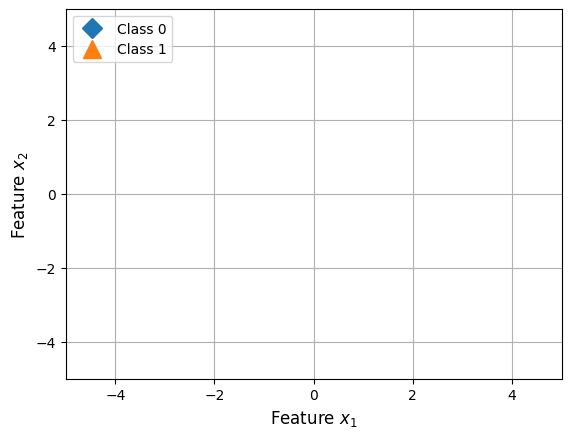

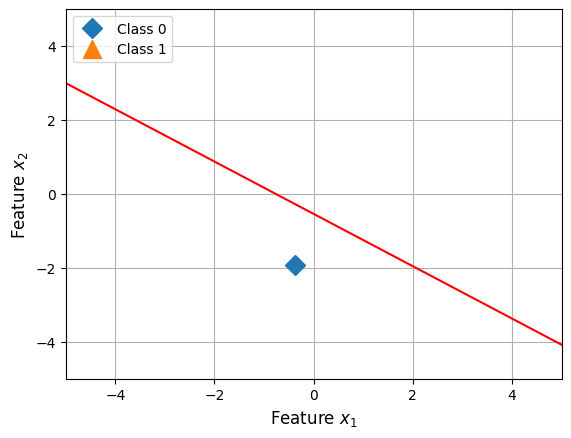

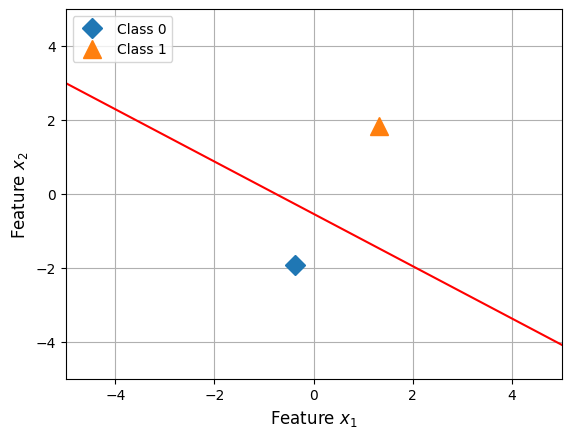

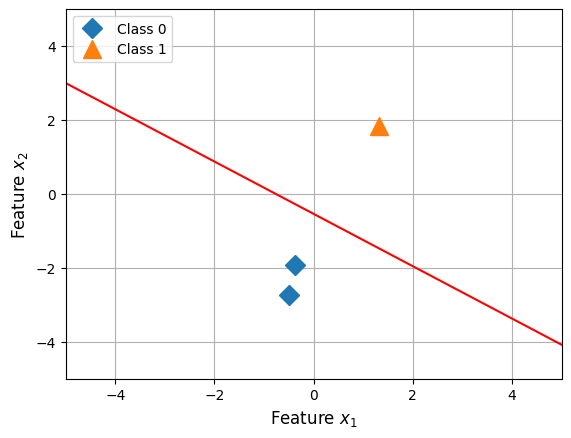

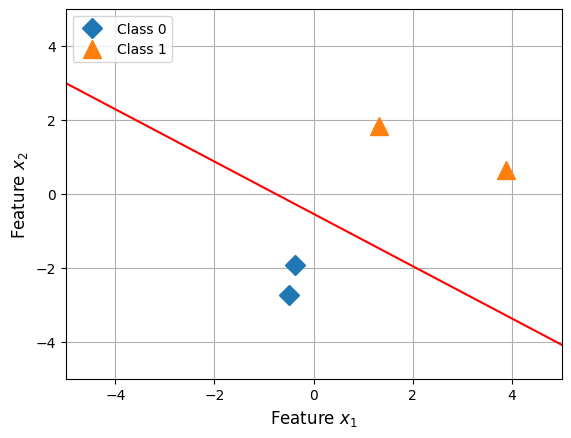

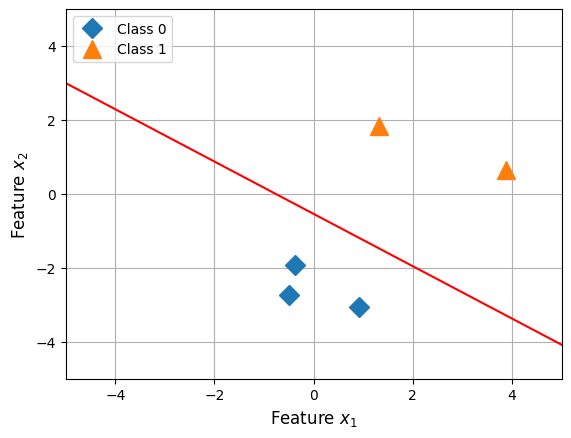

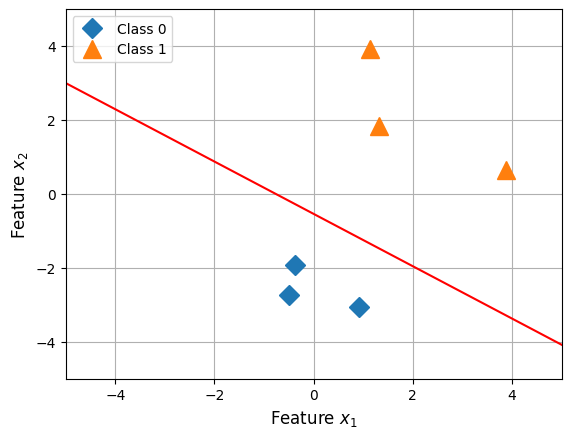

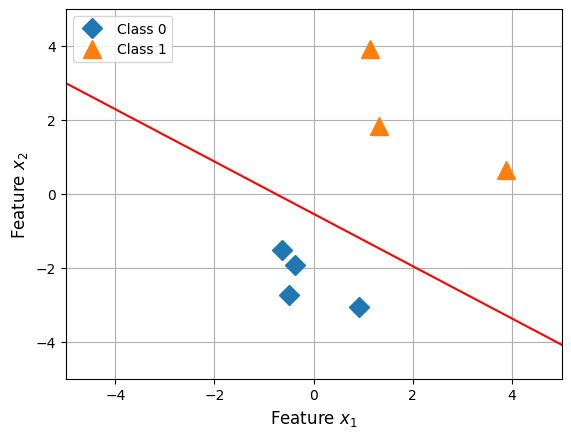

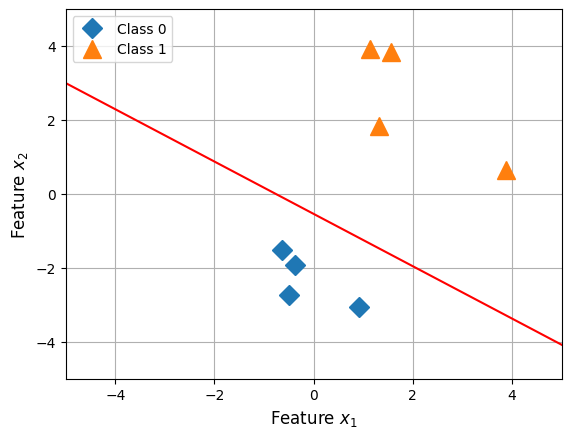

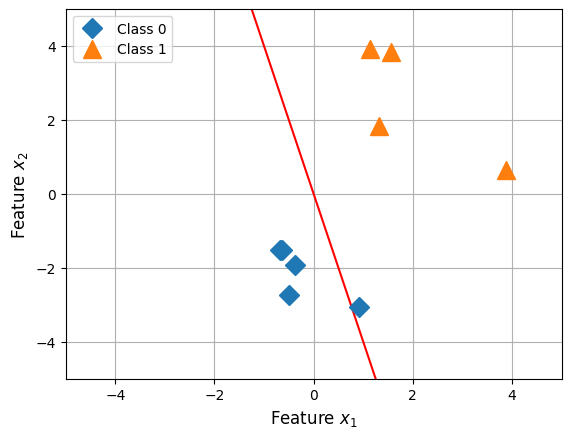

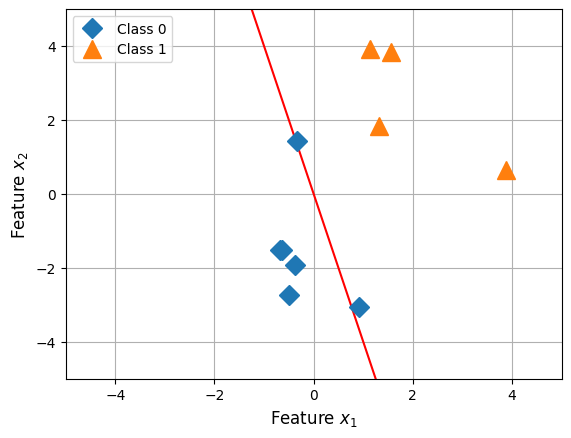

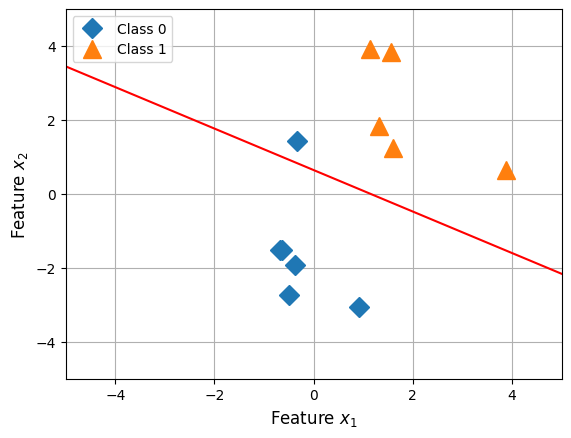

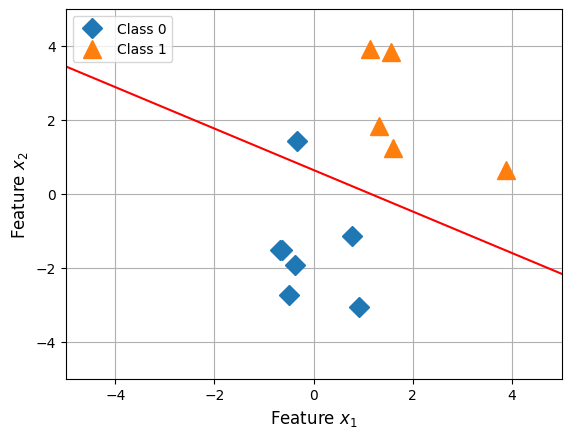

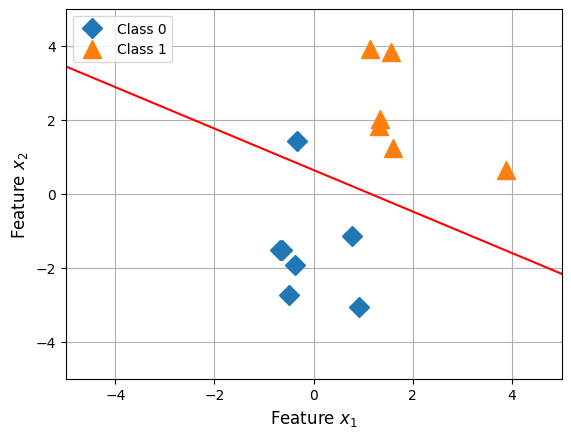

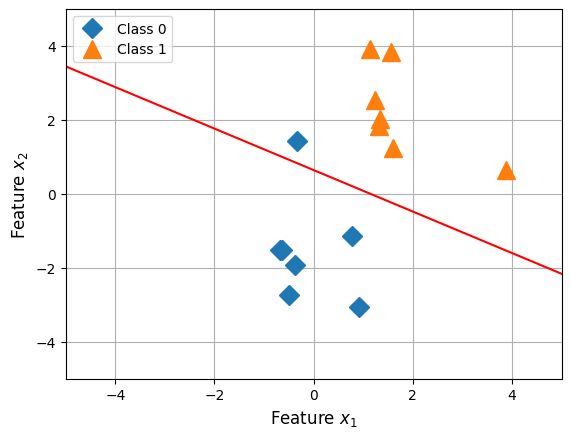

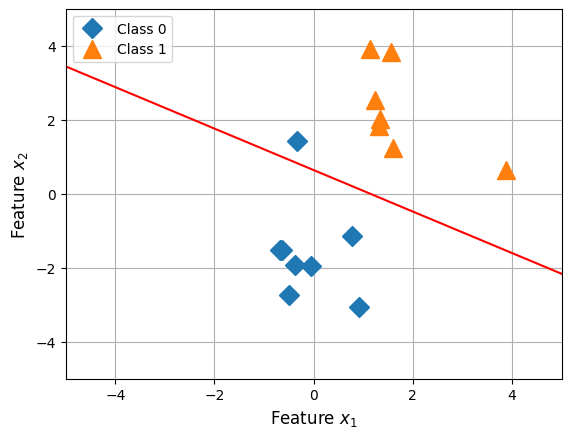

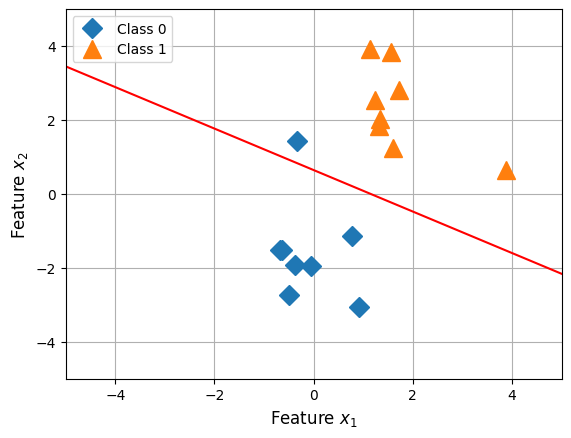

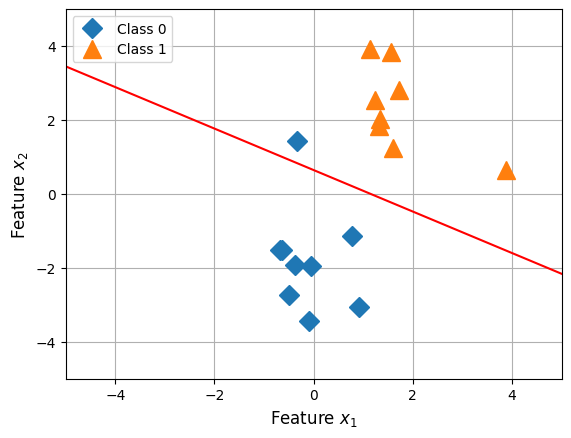

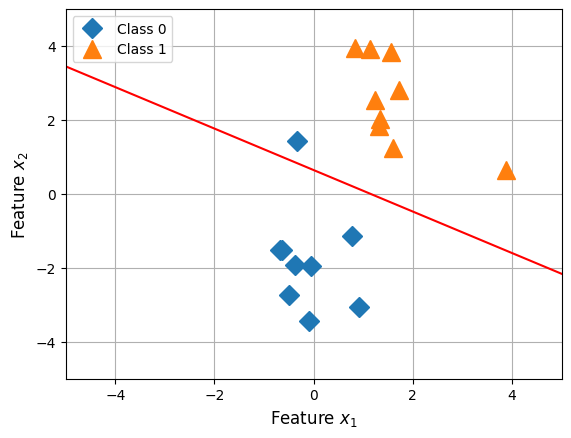

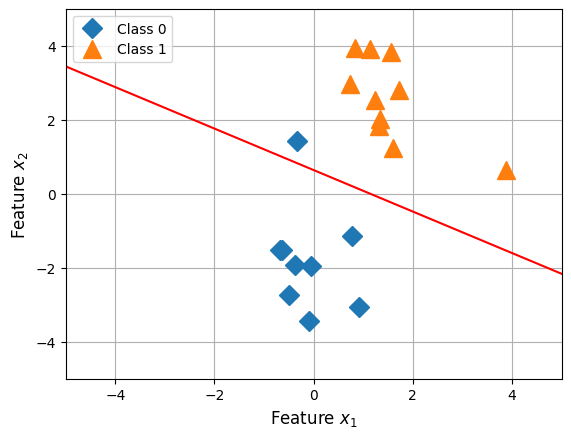

Total errors: 3.0


In [87]:
ppn = Perceptron(num_features=2)

train_and_visualize(model=ppn, all_x=shuffled_X_train, all_y=shuffled_y_train)

Notice that the decision boundary only updates when a new training point is used that is classifies incorrectly. We can see at the end that this decision boundary has not yet converged at the correct solution, because one of the points is still misclassified. Running further epochs would allow the decision boundary to converge to a perfect classifier.

Changing the value in the call to np.random.seed() will allow you to examine different training set orders and thus different convergence behaviors.